In [7]:
import numpy as np


x = np.array([1, 2, 3, 4, 5, 6])
print('beginning x:\n', x)
x_reshape = x.reshape((2, 3))
print('reshaped 2 x 3 :\n', x_reshape)

x_reshape2 = x.reshape(-1,1)
print('reshaped -1 x 1 :\n', x_reshape2)



beginning x:
 [1 2 3 4 5 6]
reshaped 2 x 3 :
 [[1 2 3]
 [4 5 6]]
reshaped -1 x 1 :
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


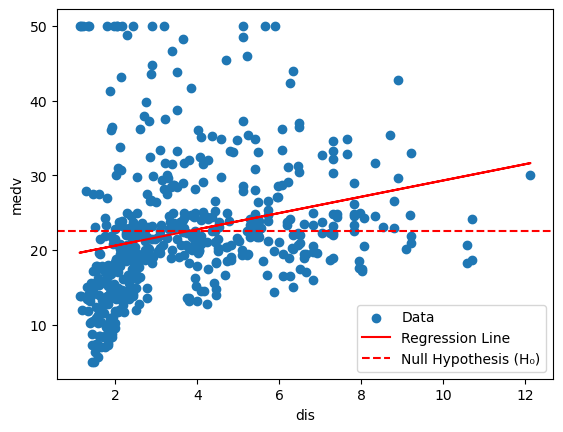

   intercept     dis
0        1.0  4.0900
1        1.0  4.9671
2        1.0  4.9671
3        1.0  6.0622


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:35:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)



Boston = load_data('Boston')


# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

#### What is the null hypotheses?
#### is it the average of the Y value? ... it means there are no relatioship between the variables

# in the null hyphoteses b1 / slope = zero
# y = b0 + b1 . X
# altennative is b1 != 0

plt.axhline(np.average(medv), color='red', linestyle='--', label="Null Hypothesis (H₀)")


# Add labels and legend
plt.legend()

# Show the plot
plt.show()


# analyse the model data
dis = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'dis': Boston['dis']})
print (dis[:4])

model = sm.OLS(medv, dis) # to specify the Ordinary Least Squares (OLS) regression model
regression_model = model.fit() # to fit the model
regression_model.summary()


In [34]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)



Boston = load_data('Boston')
# 'crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat','medv'


# Null Hypothesis (H₀): 
#         The coefficients of the independent variables are equal to zero (no effect).
#
# Alternative Hypothesis (H₁): 
#          At least one coefficient is not equal to zero (at least one independent variable has an effect on the dependent variable).

y = Boston['medv']
X = MS(['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()

print (results1.pvalues)
results1.summary()





intercept    3.794467e-16
crim         2.605302e-04
zn           7.719966e-04
indus        8.285201e-01
chas         1.173458e-03
nox          1.502073e-06
rm           4.808025e-17
age          7.865948e-01
dis          6.170894e-13
rad          1.843595e-05
tax          9.124487e-04
ptratio      4.630167e-12
lstat        6.392118e-25
dtype: float64


c:\Users\klaes\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 30 May 2024   Prob (F-statistic):          2.23e-133
Time:                        18:45:55   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""